<a href="https://colab.research.google.com/github/2303A52144/ExplainableAI_Assignment/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Regression Metrics:
RMSE : 1.24
MSE  : 1.54
MAE  : 0.75
R²   : 0.84
MAPE : inf%
MPE  : -inf%

Classification Metrics:
Accuracy : 0.93
Precision: 0.96
Recall   : 0.97
F1 Score : 0.96
ROC AUC  : 0.96

SHAP Summary Plot


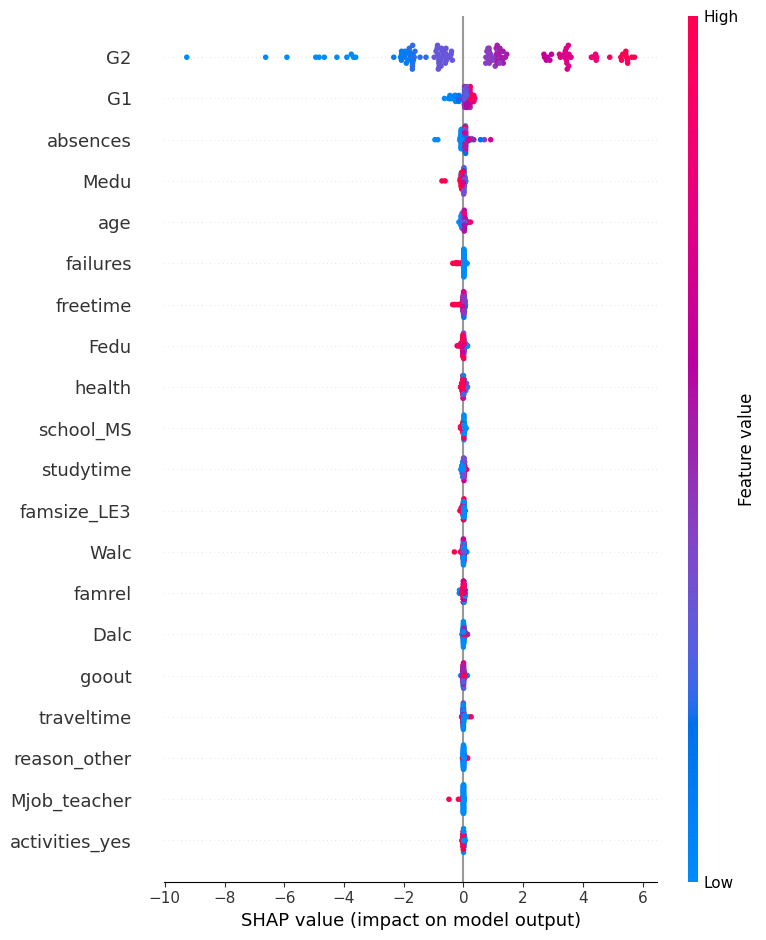


SHAP Force Plot


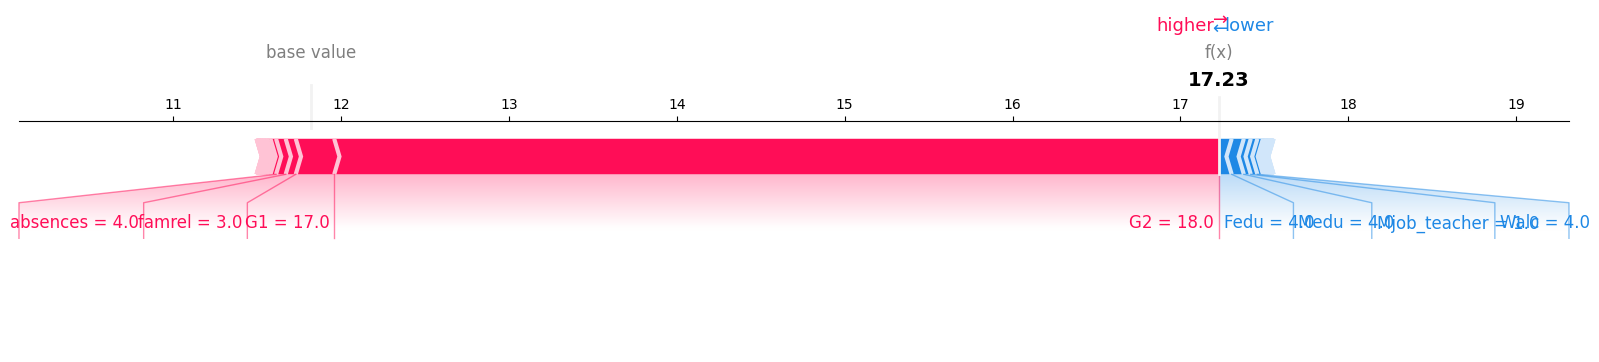


SHAP Waterfall Plot


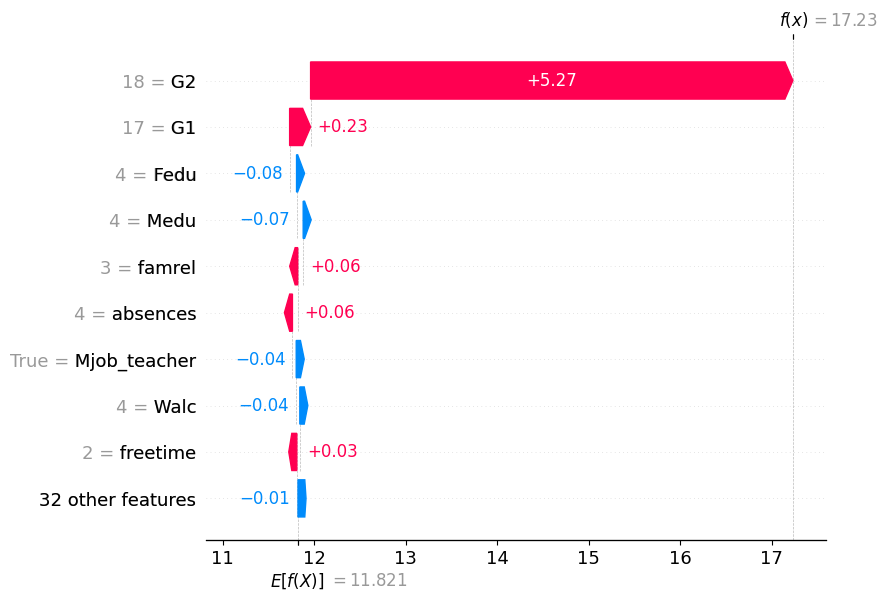

In [ ]:
# Uncomment if needed in Google Colab
# !pip install pandas scikit-learn shap matplotlib

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# Load dataset from GitHub
df = pd.read_csv(
    "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv",
    sep=';'
)

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# REGRESSION

X_reg = df.drop(columns=['G3'])
y_reg = df['G3']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
mape = np.mean(np.abs((y_test_reg - y_pred_reg) / y_test_reg)) * 100
mpe = np.mean((y_test_reg - y_pred_reg) / y_test_reg) * 100

print("\nRegression Metrics:")
print(f"RMSE : {rmse:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"MPE  : {mpe:.2f}%")

# CLASSIFICATION

df['pass'] = (df['G3'] >= 10).astype(int)
X_clf = df.drop(columns=['G3', 'pass'])
y_clf = df['pass']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

y_pred_clf = clf_model.predict(X_test_clf)
y_proba_clf = clf_model.predict_proba(X_test_clf)[:, 1]

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
roc = roc_auc_score(y_test_clf, y_proba_clf)

print("\nClassification Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"ROC AUC  : {roc:.2f}")

# SHAP ANALYSIS FOR REGRESSION

explainer = shap.TreeExplainer(reg_model)
shap_values = explainer.shap_values(X_test_reg)

print("\nSHAP Summary Plot")
shap.summary_plot(shap_values, X_test_reg)

print("\nSHAP Force Plot")
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_reg.iloc[0], matplotlib=True)

print("\nSHAP Waterfall Plot")
exp = shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_test_reg.iloc[0].values,
    feature_names=X_test_reg.columns.tolist()
)
shap.plots.waterfall(exp)
